In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from langdetect import detect
import spacy
from sklearn.metrics import roc_curve, auc

In [2]:
# Load dataset

data = pd.read_csv('r_news_all_jan_to_may_2021.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,duplicate,Engagement
0,lr3xap,Man dies after police kneel on his neck for ne...,https://amp.cnn.com/cnn/2021/02/23/us/angelo-q...,monaleeparis,100226,2021-02-23 20:43:30,17754,/r/news/comments/lr3xap/man_dies_after_police_...,NaN,False,117980
1,lsmh36,Texan files $1 billion class-action lawsuit af...,https://abcnews.go.com/US/texan-files-billion-...,ACABBLM2020,97551,2021-02-25 17:30:11,14574,/r/news/comments/lsmh36/texan_files_1_billion_...,NaN,False,112125
2,ls7xmj,Trump tax returns are now in the hands of the ...,https://www.cnbc.com/2021/02/25/trump-tax-retu...,[deleted],98318,2021-02-25 06:38:18,12719,/r/news/comments/ls7xmj/trump_tax_returns_are_...,NaN,True,111037
3,laun1r,Minneapolis police officers must keep body cam...,https://www.cnn.com/2021/02/02/us/minneapolis-...,dlkapt3,103302,2021-02-02 04:42:35,7312,/r/news/comments/laun1r/minneapolis_police_off...,NaN,False,110614
4,lsbgop,Costco lifts minimum wage above Amazon or Targ...,https://www.reuters.com/article/us-costco-whol...,candordirect,99299,2021-02-25 09:11:08,8124,/r/news/comments/lsbgop/costco_lifts_minimum_w...,NaN,False,107423
...,...,...,...,...,...,...,...,...,...,...,...
225578,ltotqd,US implicates Saudi crown prince in journalist...,https://www.thelondoneconomic.com/news/world-n...,LuckyFaithlessness3,0,2021-02-27 06:06:47,0,/r/news/comments/ltotqd/us_implicates_saudi_cr...,Already Submitted,False,0
225579,lay6kb,The article published on Lancet shows that Spu...,https://www.thelancet.com/journals/lancet/arti...,[deleted],0,2021-02-02 07:28:45,0,/r/news/comments/lay6kb/the_article_published_...,Already Submitted,False,0
225580,l995jj,Donald Trump’s entire legal team quits a week ...,https://abcnews.go.com/Politics/donald-trumps-...,redditoranna,0,2021-01-31 01:40:03,0,/r/news/comments/l995jj/donald_trumps_entire_l...,Politics - removed,False,0
225581,l9o5f1,"Wall Street's Charging Bull Covered in a Tarp,...",https://www.tmz.com/2021/01/31/wall-street-cha...,setoxxx,0,2021-01-31 14:45:33,0,/r/news/comments/l9o5f1/wall_streets_charging_...,NaN,False,0


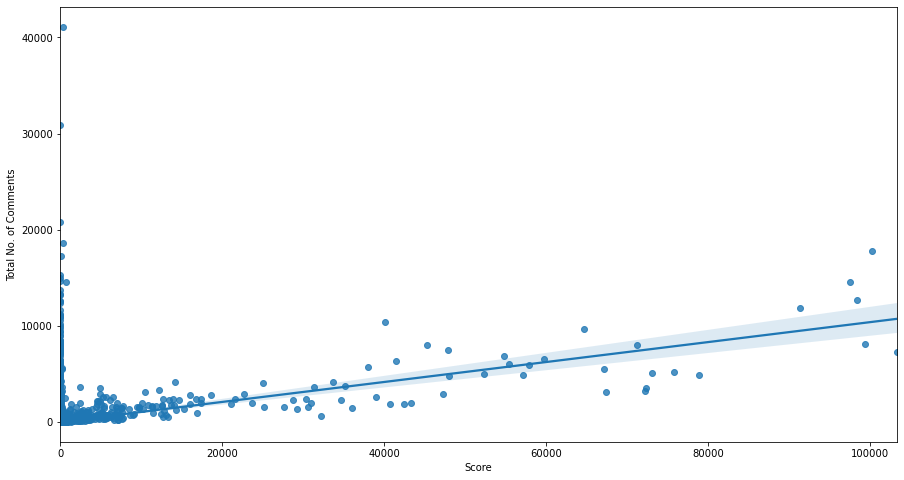

In [3]:
plt.figure(figsize=(15,8))
sns.regplot(x=data.Score, y=data['Total No. of Comments'])

plt.show()

In [4]:
data['title_case_correct'] = data['Title'].str.lower()
data['title_case_correct'] = data['title_case_correct'].astype(str).replace('[^a-zA-Z0-9 ]','',regex=True)
data['title_words'] = data['title_case_correct'].str.split()

In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['title_words'] = data['title_words'].apply(lambda x: [item for item in x if item not in stop])

In [6]:
data

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,duplicate,Engagement,title_case_correct,title_words
0,lr3xap,Man dies after police kneel on his neck for ne...,https://amp.cnn.com/cnn/2021/02/23/us/angelo-q...,monaleeparis,100226,2021-02-23 20:43:30,17754,/r/news/comments/lr3xap/man_dies_after_police_...,NaN,False,117980,man dies after police kneel on his neck for ne...,"[man, dies, police, kneel, neck, nearly, 5, mi..."
1,lsmh36,Texan files $1 billion class-action lawsuit af...,https://abcnews.go.com/US/texan-files-billion-...,ACABBLM2020,97551,2021-02-25 17:30:11,14574,/r/news/comments/lsmh36/texan_files_1_billion_...,NaN,False,112125,texan files 1 billion classaction lawsuit afte...,"[texan, files, 1, billion, classaction, lawsui..."
2,ls7xmj,Trump tax returns are now in the hands of the ...,https://www.cnbc.com/2021/02/25/trump-tax-retu...,[deleted],98318,2021-02-25 06:38:18,12719,/r/news/comments/ls7xmj/trump_tax_returns_are_...,NaN,True,111037,trump tax returns are now in the hands of the ...,"[trump, tax, returns, hands, manhattan, distri..."
3,laun1r,Minneapolis police officers must keep body cam...,https://www.cnn.com/2021/02/02/us/minneapolis-...,dlkapt3,103302,2021-02-02 04:42:35,7312,/r/news/comments/laun1r/minneapolis_police_off...,NaN,False,110614,minneapolis police officers must keep body cam...,"[minneapolis, police, officers, must, keep, bo..."
4,lsbgop,Costco lifts minimum wage above Amazon or Targ...,https://www.reuters.com/article/us-costco-whol...,candordirect,99299,2021-02-25 09:11:08,8124,/r/news/comments/lsbgop/costco_lifts_minimum_w...,NaN,False,107423,costco lifts minimum wage above amazon or targ...,"[costco, lifts, minimum, wage, amazon, target,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225578,ltotqd,US implicates Saudi crown prince in journalist...,https://www.thelondoneconomic.com/news/world-n...,LuckyFaithlessness3,0,2021-02-27 06:06:47,0,/r/news/comments/ltotqd/us_implicates_saudi_cr...,Already Submitted,False,0,us implicates saudi crown prince in journalist...,"[us, implicates, saudi, crown, prince, journal..."
225579,lay6kb,The article published on Lancet shows that Spu...,https://www.thelancet.com/journals/lancet/arti...,[deleted],0,2021-02-02 07:28:45,0,/r/news/comments/lay6kb/the_article_published_...,Already Submitted,False,0,the article published on lancet shows that spu...,"[article, published, lancet, shows, sputnik, v..."
225580,l995jj,Donald Trump’s entire legal team quits a week ...,https://abcnews.go.com/Politics/donald-trumps-...,redditoranna,0,2021-01-31 01:40:03,0,/r/news/comments/l995jj/donald_trumps_entire_l...,Politics - removed,False,0,donald trumps entire legal team quits a week b...,"[donald, trumps, entire, legal, team, quits, w..."
225581,l9o5f1,"Wall Street's Charging Bull Covered in a Tarp,...",https://www.tmz.com/2021/01/31/wall-street-cha...,setoxxx,0,2021-01-31 14:45:33,0,/r/news/comments/l9o5f1/wall_streets_charging_...,NaN,False,0,wall streets charging bull covered in a tarp f...,"[wall, streets, charging, bull, covered, tarp,..."


In [7]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

data['language'] = data['title_case_correct'].apply(det)

In [8]:
data

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,duplicate,Engagement,title_case_correct,title_words,language
0,lr3xap,Man dies after police kneel on his neck for ne...,https://amp.cnn.com/cnn/2021/02/23/us/angelo-q...,monaleeparis,100226,2021-02-23 20:43:30,17754,/r/news/comments/lr3xap/man_dies_after_police_...,NaN,False,117980,man dies after police kneel on his neck for ne...,"[man, dies, police, kneel, neck, nearly, 5, mi...",en
1,lsmh36,Texan files $1 billion class-action lawsuit af...,https://abcnews.go.com/US/texan-files-billion-...,ACABBLM2020,97551,2021-02-25 17:30:11,14574,/r/news/comments/lsmh36/texan_files_1_billion_...,NaN,False,112125,texan files 1 billion classaction lawsuit afte...,"[texan, files, 1, billion, classaction, lawsui...",en
2,ls7xmj,Trump tax returns are now in the hands of the ...,https://www.cnbc.com/2021/02/25/trump-tax-retu...,[deleted],98318,2021-02-25 06:38:18,12719,/r/news/comments/ls7xmj/trump_tax_returns_are_...,NaN,True,111037,trump tax returns are now in the hands of the ...,"[trump, tax, returns, hands, manhattan, distri...",en
3,laun1r,Minneapolis police officers must keep body cam...,https://www.cnn.com/2021/02/02/us/minneapolis-...,dlkapt3,103302,2021-02-02 04:42:35,7312,/r/news/comments/laun1r/minneapolis_police_off...,NaN,False,110614,minneapolis police officers must keep body cam...,"[minneapolis, police, officers, must, keep, bo...",en
4,lsbgop,Costco lifts minimum wage above Amazon or Targ...,https://www.reuters.com/article/us-costco-whol...,candordirect,99299,2021-02-25 09:11:08,8124,/r/news/comments/lsbgop/costco_lifts_minimum_w...,NaN,False,107423,costco lifts minimum wage above amazon or targ...,"[costco, lifts, minimum, wage, amazon, target,...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225578,ltotqd,US implicates Saudi crown prince in journalist...,https://www.thelondoneconomic.com/news/world-n...,LuckyFaithlessness3,0,2021-02-27 06:06:47,0,/r/news/comments/ltotqd/us_implicates_saudi_cr...,Already Submitted,False,0,us implicates saudi crown prince in journalist...,"[us, implicates, saudi, crown, prince, journal...",en
225579,lay6kb,The article published on Lancet shows that Spu...,https://www.thelancet.com/journals/lancet/arti...,[deleted],0,2021-02-02 07:28:45,0,/r/news/comments/lay6kb/the_article_published_...,Already Submitted,False,0,the article published on lancet shows that spu...,"[article, published, lancet, shows, sputnik, v...",en
225580,l995jj,Donald Trump’s entire legal team quits a week ...,https://abcnews.go.com/Politics/donald-trumps-...,redditoranna,0,2021-01-31 01:40:03,0,/r/news/comments/l995jj/donald_trumps_entire_l...,Politics - removed,False,0,donald trumps entire legal team quits a week b...,"[donald, trumps, entire, legal, team, quits, w...",en
225581,l9o5f1,"Wall Street's Charging Bull Covered in a Tarp,...",https://www.tmz.com/2021/01/31/wall-street-cha...,setoxxx,0,2021-01-31 14:45:33,0,/r/news/comments/l9o5f1/wall_streets_charging_...,NaN,False,0,wall streets charging bull covered in a tarp f...,"[wall, streets, charging, bull, covered, tarp,...",en


In [9]:
data = data[data['language'] == 'en']

In [10]:
data = pd.DataFrame(data)
data.reset_index(inplace=True)
data

,index,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,duplicate,Engagement,title_case_correct,title_words,language
0,0,lr3xap,Man dies after police kneel on his neck for ne...,https://amp.cnn.com/cnn/2021/02/23/us/angelo-q...,monaleeparis,100226,2021-02-23 20:43:30,17754,/r/news/comments/lr3xap/man_dies_after_police_...,NaN,False,117980,man dies after police kneel on his neck for ne...,"[man, dies, police, kneel, neck, nearly, 5, mi...",en
1,1,lsmh36,Texan files $1 billion class-action lawsuit af...,https://abcnews.go.com/US/texan-files-billion-...,ACABBLM2020,97551,2021-02-25 17:30:11,14574,/r/news/comments/lsmh36/texan_files_1_billion_...,NaN,False,112125,texan files 1 billion classaction lawsuit afte...,"[texan, files, 1, billion, classaction, lawsui...",en
2,2,ls7xmj,Trump tax returns are now in the hands of the ...,https://www.cnbc.com/2021/02/25/trump-tax-retu...,[deleted],98318,2021-02-25 06:38:18,12719,/r/news/comments/ls7xmj/trump_tax_returns_are_...,NaN,True,111037,trump tax returns are now in the hands of the ...,"[trump, tax, returns, hands, manhattan, distri...",en
3,3,laun1r,Minneapolis police officers must keep body cam...,https://www.cnn.com/2021/02/02/us/minneapolis-...,dlkapt3,103302,2021-02-02 04:42:35,7312,/r/news/comments/laun1r/minneapolis_police_off...,NaN,False,110614,minneapolis police officers must keep body cam...,"[minneapolis, police, officers, must, keep, bo...",en
4,4,lsbgop,Costco lifts minimum wage above Amazon or Targ...,https://www.reuters.com/article/us-costco-whol...,candordirect,99299,2021-02-25 09:11:08,8124,/r/news/comments/lsbgop/costco_lifts_minimum_w...,NaN,False,107423,costco lifts minimum wage above amazon or targ...,"[costco, lifts, minimum, wage, amazon, target,...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166423,225578,ltotqd,US implicates Saudi crown prince in journalist...,https://www.thelondoneconomic.com/news/world-n...,LuckyFaithlessness3,0,2021-02-27 06:06:47,0,/r/news/comments/ltotqd/us_implicates_saudi_cr...,Already Submitted,False,0,us implicates saudi crown prince in journalist...,"[us, implicates, saudi, crown, prince, journal...",en
166424,225579,lay6kb,The article published on Lancet shows that Spu...,https://www.thelancet.com/journals/lancet/arti...,[deleted],0,2021-02-02 07:28:45,0,/r/news/comments/lay6kb/the_article_published_...,Already Submitted,False,0,the article published on lancet shows that spu...,"[article, published, lancet, shows, sputnik, v...",en
166425,225580,l995jj,Donald Trump’s entire legal team quits a week ...,https://abcnews.go.com/Politics/donald-trumps-...,redditoranna,0,2021-01-31 01:40:03,0,/r/news/comments/l995jj/donald_trumps_entire_l...,Politics - removed,False,0,donald trumps entire legal team quits a week b...,"[donald, trumps, entire, legal, team, quits, w...",en
166426,225581,l9o5f1,"Wall Street's Charging Bull Covered in a Tarp,...",https://www.tmz.com/2021/01/31/wall-street-cha...,setoxxx,0,2021-01-31 14:45:33,0,/r/news/comments/l9o5f1/wall_streets_charging_...,NaN,False,0,wall streets charging bull covered in a tarp f...,"[wall, streets, charging, bull, covered, tarp,...",en


In [11]:
nlp = spacy.load('en_core_web_sm')

In [12]:
data['lemmatized'] = data['title_case_correct']

In [13]:
data['lemmatized'] = data['lemmatized'].apply(lambda row: " ".join(w.lemma_ for w in nlp(row)))

In [14]:

data['lemmatized_words'] = data['lemmatized'].str.split()

In [15]:
data['lemmatized_words'] = data['lemmatized_words'].apply(lambda x: [item for item in x if item not in stop])

In [16]:
data.to_csv('r_news_full_jan_to_may_2021.csv')

In [17]:
data_all = pd.DataFrame(data)
data_all = data_all.drop('index',axis=1)

In [18]:
# Add Percentile to the headlines

data_all['score_percentile'] = data_all.Score.rank(pct=True)
data_all['comments_percentile'] = data_all['Total No. of Comments'].rank(pct=True)
data_all['engagement_percentile'] = data_all.Engagement.rank(pct=True)

In [19]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50)
bands = [(data_all['score_percentile'] >= .95), (data_all['score_percentile'] < .95) & (data_all['score_percentile'] > .5), (data_all['score_percentile'] <= .5)]
values = ['Top 5', 'Middle 45', 'Bottom 50']
data_all['score_band'] = np.select(bands, values)

In [20]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50) for comments now
bands = [(data_all['comments_percentile'] >= .95), (data_all['comments_percentile'] < .95) & (data_all['comments_percentile'] > .5), (data_all['comments_percentile'] <= .5)]
values = ['Top 5', 'Middle 45', 'Bottom 50']
data_all['comm_band'] = np.select(bands, values)

In [21]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50) for comments now
bands = [(data_all['engagement_percentile'] >= .95), (data_all['engagement_percentile'] < .95) & (data_all['engagement_percentile'] > .5), (data_all['engagement_percentile'] <= .5)]
values = ['Top 5', 'Middle 45', 'Bottom 50']
data_all['eng_band'] = np.select(bands, values)

In [22]:
# Make data_all sets for each band
data_all_score_5 = data_all[data_all['score_band'] == 'Top 5']
data_all_score_45 = data_all[data_all['score_band'] == 'Middle 45']
data_all_score_50 = data_all[data_all['score_band'] == 'Bottom 50']
data_all_comm_5 = data_all[data_all['comm_band'] == 'Top 5']
data_all_comm_45 = data_all[data_all['comm_band'] == 'Middle 45']
data_all_comm_50 = data_all[data_all['comm_band'] == 'Bottom 50']
data_all_eng_5 = data_all[data_all['eng_band'] == 'Top 5']
data_all_eng_45 = data_all[data_all['eng_band'] == 'Middle 45']
data_all_eng_50 = data_all[data_all['eng_band'] == 'Bottom 50']

In [23]:
data_labelled = pd.DataFrame(data)
data_labelled['labels'] = 0
data_labelled = data_labelled.drop('index',axis=1)
data_labelled

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,duplicate,Engagement,title_case_correct,title_words,language,lemmatized,lemmatized_words,labels
0,lr3xap,Man dies after police kneel on his neck for ne...,https://amp.cnn.com/cnn/2021/02/23/us/angelo-q...,monaleeparis,100226,2021-02-23 20:43:30,17754,/r/news/comments/lr3xap/man_dies_after_police_...,NaN,False,117980,man dies after police kneel on his neck for ne...,"[man, dies, police, kneel, neck, nearly, 5, mi...",en,man die after police kneel on his neck for nea...,"[man, die, police, kneel, neck, nearly, 5, min...",0
1,lsmh36,Texan files $1 billion class-action lawsuit af...,https://abcnews.go.com/US/texan-files-billion-...,ACABBLM2020,97551,2021-02-25 17:30:11,14574,/r/news/comments/lsmh36/texan_files_1_billion_...,NaN,False,112125,texan files 1 billion classaction lawsuit afte...,"[texan, files, 1, billion, classaction, lawsui...",en,texan file 1 billion classaction lawsuit after...,"[texan, file, 1, billion, classaction, lawsuit...",0
2,ls7xmj,Trump tax returns are now in the hands of the ...,https://www.cnbc.com/2021/02/25/trump-tax-retu...,[deleted],98318,2021-02-25 06:38:18,12719,/r/news/comments/ls7xmj/trump_tax_returns_are_...,NaN,True,111037,trump tax returns are now in the hands of the ...,"[trump, tax, returns, hands, manhattan, distri...",en,trump tax return be now in the hand of the man...,"[trump, tax, return, hand, manhattan, district...",0
3,laun1r,Minneapolis police officers must keep body cam...,https://www.cnn.com/2021/02/02/us/minneapolis-...,dlkapt3,103302,2021-02-02 04:42:35,7312,/r/news/comments/laun1r/minneapolis_police_off...,NaN,False,110614,minneapolis police officers must keep body cam...,"[minneapolis, police, officers, must, keep, bo...",en,minneapolis police officer must keep body came...,"[minneapolis, police, officer, must, keep, bod...",0
4,lsbgop,Costco lifts minimum wage above Amazon or Targ...,https://www.reuters.com/article/us-costco-whol...,candordirect,99299,2021-02-25 09:11:08,8124,/r/news/comments/lsbgop/costco_lifts_minimum_w...,NaN,False,107423,costco lifts minimum wage above amazon or targ...,"[costco, lifts, minimum, wage, amazon, target,...",en,costco lift minimum wage above amazon or targe...,"[costco, lift, minimum, wage, amazon, target, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166423,ltotqd,US implicates Saudi crown prince in journalist...,https://www.thelondoneconomic.com/news/world-n...,LuckyFaithlessness3,0,2021-02-27 06:06:47,0,/r/news/comments/ltotqd/us_implicates_saudi_cr...,Already Submitted,False,0,us implicates saudi crown prince in journalist...,"[us, implicates, saudi, crown, prince, journal...",en,we implicate saudi crown prince in journalist ...,"[implicate, saudi, crown, prince, journalist, ...",0
166424,lay6kb,The article published on Lancet shows that Spu...,https://www.thelancet.com/journals/lancet/arti...,[deleted],0,2021-02-02 07:28:45,0,/r/news/comments/lay6kb/the_article_published_...,Already Submitted,False,0,the article published on lancet shows that spu...,"[article, published, lancet, shows, sputnik, v...",en,the article publish on lancet show that sputni...,"[article, publish, lancet, show, sputnik, v, v...",0
166425,l995jj,Donald Trump’s entire legal team quits a week ...,https://abcnews.go.com/Politics/donald-trumps-...,redditoranna,0,2021-01-31 01:40:03,0,/r/news/comments/l995jj/donald_trumps_entire_l...,Politics - removed,False,0,donald trumps entire legal team quits a week b...,"[donald, trumps, entire, legal, team, quits, w...",en,donald trump entire legal team quit a week bef...,"[donald, trump, entire, legal, team, quit, wee...",0
166426,l9o5f1,"Wall Street's Charging Bull Covered in a Tarp,...",https://www.tmz.com/2021/01/31/wall-street-cha...,setoxxx,0,2021-01-31 14:45:33,0,/r/news/comments/l9o5f1/wall_streets_charging_...,NaN,False,0,wall streets charging bull covered in a tarp f...,"[wall, streets, charging, bull, cov

In [24]:
dl_range = range(0,data_labelled.shape[0]-1)
story_labels = ['capitol','chauvin','floyd','breonna',]

for i in dl_range:
    if any(item in data_labelled['title_words'][i] for item in story_labels) == True:
        data_labelled['labels'].iloc[i] = 1
    else:
        data_labelled['labels'].iloc[i] = 0

C:\Users\webge\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
# Add Percentile to the headlines

data_labelled['score_percentile'] = data_labelled.Score.rank(pct=True)
data_labelled['comments_percentile'] = data_labelled['Total No. of Comments'].rank(pct=True)
data_labelled['engagement_percentile'] = data_labelled.Engagement.rank(pct=True)

In [26]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50)
bands = [(data_labelled['score_percentile'] >= .95), (data_labelled['score_percentile'] < .95) & (data_labelled['score_percentile'] > .5), (data_labelled['score_percentile'] <= .5)]
values = ['Top 5', 'Middle 45', 'Bottom 50']
data_labelled['score_band'] = np.select(bands, values)

In [27]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50) for comments now
bands = [(data_labelled['comments_percentile'] >= .95), (data_labelled['comments_percentile'] < .95) & (data_labelled['comments_percentile'] > .5), (data_labelled['comments_percentile'] <= .5)]
values = ['Top 5', 'Middle 45', 'Bottom 50']
data_labelled['comm_band'] = np.select(bands, values)

In [28]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50) for comments now
bands = [(data_labelled['engagement_percentile'] >= .95), (data_labelled['engagement_percentile'] < .95) & (data_labelled['engagement_percentile'] > .5), (data_labelled['engagement_percentile'] <= .5)]
values = ['Top 5', 'Middle 45', 'Bottom 50']
data_labelled['eng_band'] = np.select(bands, values)

In [29]:
# Make data_labelled sets for each band
data_labelled_score_5 = data_labelled[data_labelled['score_band'] == 'Top 5']
data_labelled_score_45 = data_labelled[data_labelled['score_band'] == 'Middle 45']
data_labelled_score_50 = data_labelled[data_labelled['score_band'] == 'Bottom 50']
data_labelled_comm_5 = data_labelled[data_labelled['comm_band'] == 'Top 5']
data_labelled_comm_45 = data_labelled[data_labelled['comm_band'] == 'Middle 45']
data_labelled_comm_50 = data_labelled[data_labelled['comm_band'] == 'Bottom 50']
data_labelled_eng_5 = data_labelled[data_labelled['eng_band'] == 'Top 5']
data_labelled_eng_45 = data_labelled[data_labelled['eng_band'] == 'Middle 45']
data_labelled_eng_50 = data_labelled[data_labelled['eng_band'] == 'Bottom 50']

In [30]:
data_labelled_eng_5['labels'].value_counts()

0    7796
1     575
Name: labels, dtype: int64

In [31]:
data_non_major = pd.DataFrame(data_labelled[data_labelled['labels'] == 0])
data_non_major.reset_index()

data_non_major

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,duplicate,...,language,lemmatized,lemmatized_words,labels,score_percentile,comments_percentile,engagement_percentile,score_band,comm_band,eng_band
0,lr3xap,Man dies after police kneel on his neck for ne...,https://amp.cnn.com/cnn/2021/02/23/us/angelo-q...,monaleeparis,100226,2021-02-23 20:43:30,17754,/r/news/comments/lr3xap/man_dies_after_police_...,NaN,False,...,en,man die after police kneel on his neck for nea...,"[man, die, police, kneel, neck, nearly, 5, min...",0,0.999994,0.999976,1.000000,Top 5,Top 5,Top 5
1,lsmh36,Texan files $1 billion class-action lawsuit af...,https://abcnews.go.com/US/texan-files-billion-...,ACABBLM2020,97551,2021-02-25 17:30:11,14574,/r/news/comments/lsmh36/texan_files_1_billion_...,NaN,False,...,en,texan file 1 billion classaction lawsuit after...,"[texan, file, 1, billion, classaction, lawsuit...",0,0.999976,0.999946,0.999994,Top 5,Top 5,Top 5
2,ls7xmj,Trump tax returns are now in the hands of the ...,https://www.cnbc.com/2021/02/25/trump-tax-retu...,[deleted],98318,2021-02-25 06:38:18,12719,/r/news/comments/ls7xmj/trump_tax_returns_are_...,NaN,True,...,en,trump tax return be now in the hand of the man...,"[trump, tax, return, hand, manhattan, district...",0,0.999982,0.999916,0.999988,Top 5,Top 5,Top 5
3,laun1r,Minneapolis police officers must keep body cam...,https://www.cnn.com/2021/02/02/us/minneapolis-...,dlkapt3,103302,2021-02-02 04:42:35,7312,/r/news/comments/laun1r/minneapolis_police_off...,NaN,False,...,en,minneapolis police officer must keep body came...,"[minneapolis, police, officer, must, keep, bod...",0,1.000000,0.999664,0.999982,Top 5,Top 5,Top 5
4,lsbgop,Costco lifts minimum wage above Amazon or Targ...,https://www.reuters.com/article/us-costco-whol...,candordirect,99299,2021-02-25 09:11:08,8124,/r/news/comments/lsbgop/costco_lifts_minimum_w...,NaN,False,...,en,costco lift minimum wage above amazon or targe...,"[costco, lift, minimum, wage, amazon, target, ...",0,0.999988,0.999742,0.999976,Top 5,Top 5,Top 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166423,ltotqd,US implicates Saudi crown prince in journalist...,https://www.thelondoneconomic.com/news/world-n...,LuckyFaithlessness3,0,2021-02-27 06:06:47,0,/r/news/comments/ltotqd/us_implicates_saudi_cr...,Already Submitted,False,...,en,we implicate saudi crown prince in journalist ...,"[implicate, saudi, crown, prince, journalist, ...",0,0.001628,0.444078,0.000724,Bottom 50,Bottom 50,Bottom 50
166424,lay6kb,The article published on Lancet shows that Spu...,https://www.thelancet.com/journals/lancet/arti...,[deleted],0,2021-02-02 07:28:45,0,/r/news/comments/lay6kb/the_article_published_...,Already Submitted,False,...,en,the article publish on lancet show that sputni...,"[article, publish, lancet, show, sputnik, v, v...",0,0.001628,0.444078,0.000724,Bottom 50,Bottom 50,Bottom 50
166425,l995jj,Donald Trump’s entire legal team quits a week ...,https://abcnews.go.com/Politics/donald-trumps-...,redditoranna,0,2021-01-31 01:40:03,0,/r/news/comments/l995jj/donald_trumps_entire_l...,Politics - removed,False,...,en,donald trump entire legal team quit a week bef...,"[donald, trump, entire, legal, team, quit, wee...",0,0.001628,0.444078,0.000724,Bottom 50,Bottom 50,Bottom 50
166426,l9o5f1,"Wall Street's Charging Bull Covered in a Tarp,...",https://www.tmz.com/2021/01/31/wall-street-cha...,setoxxx,0,2021-01-31 14:45:33,0,/r/news/comments/l9o5f1/wall_streets_charging_...,NaN,False,...,en,wall street charge bull cover in a tarp fear o...,"[wall, street, charge, bull, cover, tarp, fear...",0,0.001628,0.444078,0.000724,Bottom 50,Bottom 50,Bottom 50


In [32]:
# Add Percentile to the headlines

data_non_major['score_percentile'] = data_non_major.Score.rank(pct=True)
data_non_major['comments_percentile'] = data_non_major['Total No. of Comments'].rank(pct=True)
data_non_major['engagement_percentile'] = data_non_major.Engagement.rank(pct=True)

In [33]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50)
bands = [(data_non_major['score_percentile'] >= .95), (data_non_major['score_percentile'] < .95) & (data_non_major['score_percentile'] > .5), (data_non_major['score_percentile'] <= .5)]
values = ['Top 5', 'Middle 45', 'Bottom 50']
data_non_major['score_band'] = np.select(bands, values)

In [34]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50) for comments now
bands = [(data_non_major['comments_percentile'] >= .95), (data_non_major['comments_percentile'] < .95) & (data_non_major['comments_percentile'] > .5), (data_non_major['comments_percentile'] <= .5)]
values = ['Top 5', 'Middle 45', 'Bottom 50']
data_non_major['comm_band'] = np.select(bands, values)

In [35]:
# Convert percentiles to bands (Top 10, Middle 40, Bottom 50) for comments now
bands = [(data_non_major['engagement_percentile'] >= .95), (data_non_major['engagement_percentile'] < .95) & (data_non_major['engagement_percentile'] > .5), (data_non_major['engagement_percentile'] <= .5)]
values = ['Top 5', 'Middle 45', 'Bottom 50']
data_non_major['eng_band'] = np.select(bands, values)

In [36]:
# Make data_non_major sets for each band
data_non_major_score_5 = data_non_major[data_non_major['score_band'] == 'Top 5']
data_non_major_score_45 = data_non_major[data_non_major['score_band'] == 'Middle 45']
data_non_major_score_50 = data_non_major[data_non_major['score_band'] == 'Bottom 50']
data_non_major_comm_5 = data_non_major[data_non_major['comm_band'] == 'Top 5']
data_non_major_comm_45 = data_non_major[data_non_major['comm_band'] == 'Middle 45']
data_non_major_comm_50 = data_non_major[data_non_major['comm_band'] == 'Bottom 50']
data_non_major_eng_5 = data_non_major[data_non_major['eng_band'] == 'Top 5']
data_non_major_eng_45 = data_non_major[data_non_major['eng_band'] == 'Middle 45']
data_non_major_eng_50 = data_non_major[data_non_major['eng_band'] == 'Bottom 50']

In [37]:
data_non_major_eng_5

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,duplicate,...,language,lemmatized,lemmatized_words,labels,score_percentile,comments_percentile,engagement_percentile,score_band,comm_band,eng_band
0,lr3xap,Man dies after police kneel on his neck for ne...,https://amp.cnn.com/cnn/2021/02/23/us/angelo-q...,monaleeparis,100226,2021-02-23 20:43:30,17754,/r/news/comments/lr3xap/man_dies_after_police_...,NaN,False,...,en,man die after police kneel on his neck for nea...,"[man, die, police, kneel, neck, nearly, 5, min...",0,0.999994,0.999994,1.000000,Top 5,Top 5,Top 5
1,lsmh36,Texan files $1 billion class-action lawsuit af...,https://abcnews.go.com/US/texan-files-billion-...,ACABBLM2020,97551,2021-02-25 17:30:11,14574,/r/news/comments/lsmh36/texan_files_1_billion_...,NaN,False,...,en,texan file 1 billion classaction lawsuit after...,"[texan, file, 1, billion, classaction, lawsuit...",0,0.999975,0.999963,0.999994,Top 5,Top 5,Top 5
2,ls7xmj,Trump tax returns are now in the hands of the ...,https://www.cnbc.com/2021/02/25/trump-tax-retu...,[deleted],98318,2021-02-25 06:38:18,12719,/r/news/comments/ls7xmj/trump_tax_returns_are_...,NaN,True,...,en,trump tax return be now in the hand of the man...,"[trump, tax, return, hand, manhattan, district...",0,0.999981,0.999944,0.999988,Top 5,Top 5,Top 5
3,laun1r,Minneapolis police officers must keep body cam...,https://www.cnn.com/2021/02/02/us/minneapolis-...,dlkapt3,103302,2021-02-02 04:42:35,7312,/r/news/comments/laun1r/minneapolis_police_off...,NaN,False,...,en,minneapolis police officer must keep body came...,"[minneapolis, police, officer, must, keep, bod...",0,1.000000,0.999733,0.999981,Top 5,Top 5,Top 5
4,lsbgop,Costco lifts minimum wage above Amazon or Targ...,https://www.reuters.com/article/us-costco-whol...,candordirect,99299,2021-02-25 09:11:08,8124,/r/news/comments/lsbgop/costco_lifts_minimum_w...,NaN,False,...,en,costco lift minimum wage above amazon or targe...,"[costco, lift, minimum, wage, amazon, target, ...",0,0.999988,0.999801,0.999975,Top 5,Top 5,Top 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8725,m130fm,Humans have 'destroyed or degraded' two-thirds...,https://www.sbs.com.au/news/humans-have-destro...,Sumit316,1,2021-03-09 01:30:37,17,/r/news/comments/m130fm/humans_have_destroyed_...,NaN,False,...,en,human have destroy or degrade twothird of the ...,"[human, destroy, degrade, twothird, world, ori...",0,0.480373,0.954219,0.950025,Bottom 50,Top 5,Top 5
8726,n0grkv,Alleged Drunk Woman With Suspended License Kil...,https://www.nbcnewyork.com/news/local/officer-...,ryhenning,1,2021-04-28 08:01:52,17,/r/news/comments/n0grkv/alleged_drunk_woman_wi...,NaN,False,...,en,allege drunk woman with suspend license kill n...,"[allege, drunk, woman, suspend, license, kill,...",0,0.480373,0.954219,0.950025,Bottom 50,Top 5,Top 5
8727,mftsb9,Turkey must resume accepting migrants from Gre...,https://www.france24.com/en/live-news/20210329...,glasschessset,1,2021-03-29 09:48:22,17,/r/news/comments/mftsb9/turkey_must_resume_acc...,NaN,False,...,en,turkey must resume accept migrant from greece eu,"[turkey, must, resume, accept, migrant, greece...",0,0.480373,0.954219,0.950025,Bottom 50,Top 5,Top 5
8728,lfdmru,The decapitated body of an archaeologist kille...,https://etrendsnews.com/2021/02/08/the-decapit...,Aimoo123,1,2021-02-08 07:03:39,17,/r/news/comments/lfdmru/the_decapitated_body_o...,NaN,False,...,en,the decapitated body of an archaeologist kill ...,"[decapitated, body, archaeologist, kill, isis,...",0,0.480373,0.954219,0.950025,Bottom 50,Top 5,Top 5


In [38]:
data.to_csv('r_news_EDAed_jan_to_may_2021.csv')
data_all.to_csv('r_news_all_EDAed_jan_to_may_2021.csv')
data_labelled.to_csv('r_news_labelled_EDAed_jan_to_may_2021.csv')
data_non_major.to_csv('r_news_non_major_EDAed_jan_to_may_2021.csv')